In [123]:
import pandas as pd
from pandas import datetime
import matplotlib.pylab as plt
import numpy as np
import datetime as Datetime
from statsmodels.tsa.stattools import adfuller
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6

/Users/sdidwani/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [111]:
dateparse = lambda dates : pd.datetime.strptime(dates,"%Y-%m")
data = pd.read_csv('AirPassengers.csv',parse_dates = [0],index_col = 'Month',date_parser = dateparse)
print(data.head(30))
type(data)
data.dtypes

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
1949-06-01          135
1949-07-01          148
1949-08-01          148
1949-09-01          136
1949-10-01          119
1949-11-01          104
1949-12-01          118
1950-01-01          115
1950-02-01          126
1950-03-01          141
1950-04-01          135
1950-05-01          125
1950-06-01          149
1950-07-01          170
1950-08-01          170
1950-09-01          158
1950-10-01          133
1950-11-01          114
1950-12-01          140
1951-01-01          145
1951-02-01          150
1951-03-01          178
1951-04-01          163
1951-05-01          172
1951-06-01          178


#Passengers    int64
dtype: object

In [122]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [113]:
ts = data['#Passengers']

In [114]:
ts['1951-06-01']

178

In [116]:
ts[0:5]

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

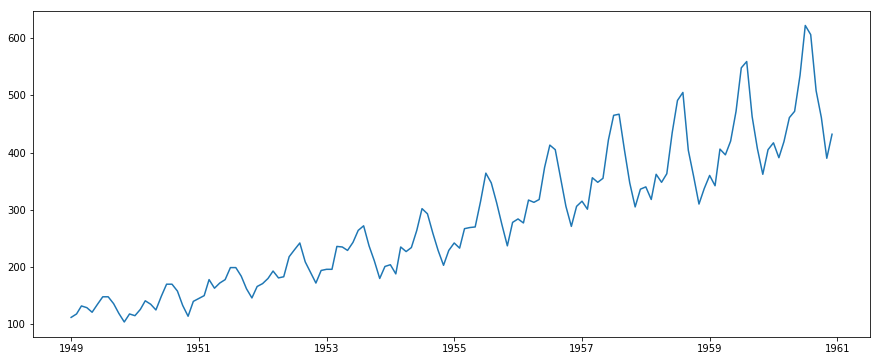

In [121]:
plt.plot(ts)

In [135]:
def test_stationarity(timeseries):
    rollmean = pd.rolling_mean(timeseries,window =12)
    rollstd = pd.rolling_std(timeseries,window =12)
    orig = plt.plot(timeseries,color = 'blue',label = 'Original')
    rmean = plt.plot(rollmean,color = 'green',label = 'Rolling mean')
    rstd = plt.plot(rollstd,color = 'red',label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling mean and Standard Deviation')
    plt.show(block = False)
    
    print("Result for Dickey Fuller test")
    dftest = adfuller(timeseries,autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput
        

/Users/sdidwani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/Users/sdidwani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


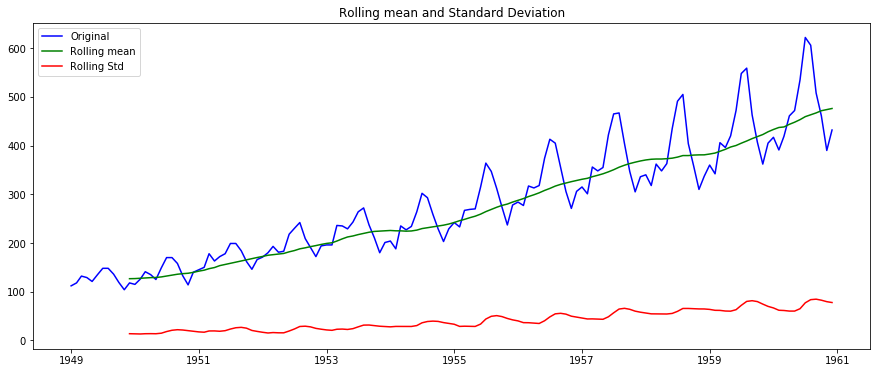

Result for Dickey Fuller test


Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

In [136]:
test_stationarity(ts)

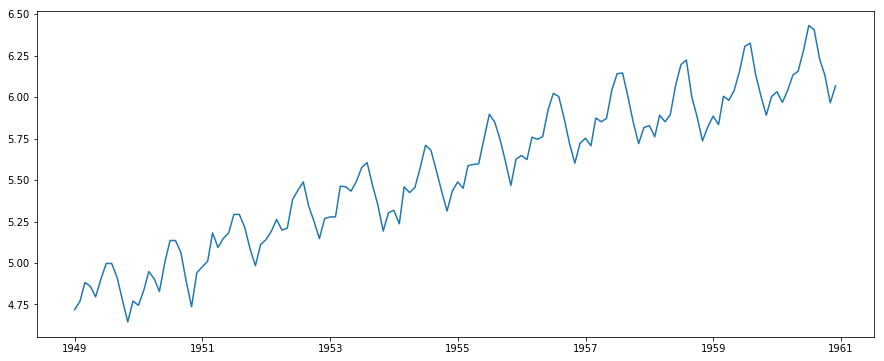

In [138]:
ts_log = np.log(ts)
plt.plot(ts_log)

In [139]:
moving_avg = pd.rolling_mean(ts_log,window = 12)

/Users/sdidwani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


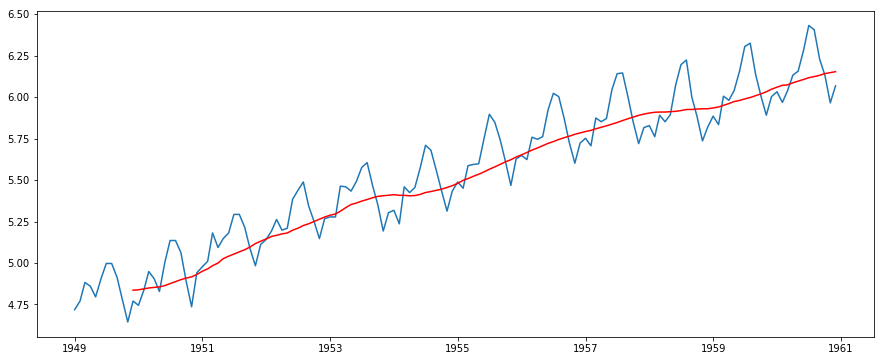

In [140]:
plt.plot(ts_log)
plt.plot(moving_avg,color = 'red')

In [141]:
diff = ts_log-moving_avg

In [143]:
diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

In [145]:
diff.dropna(inplace = True)

In [146]:
diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

/Users/sdidwani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/Users/sdidwani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


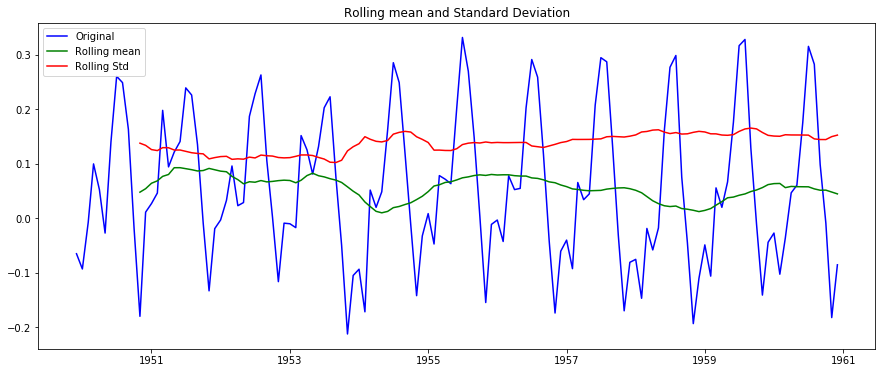

Result for Dickey Fuller test


Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64

In [147]:
test_stationarity(diff)

In [149]:
ts_log_diff = ts_log-ts_log.shift()

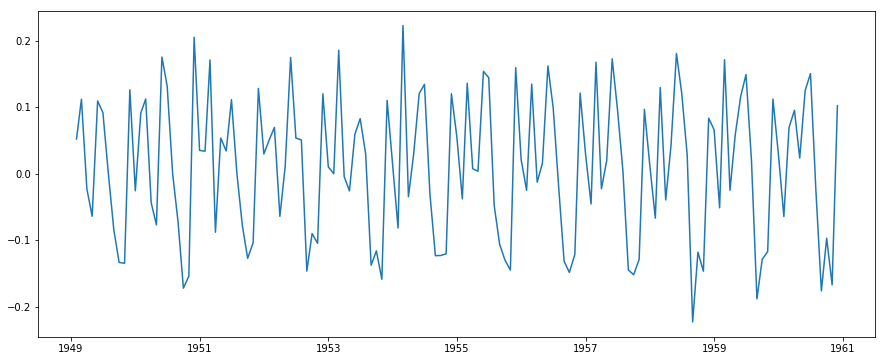

In [150]:
plt.plot(ts_log_diff)

In [153]:
ts_log_diff.head()

Month
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
Name: #Passengers, dtype: float64

In [154]:
ts_log_diff.dropna(inplace =True)

In [155]:
ts_log_diff.head()

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
Name: #Passengers, dtype: float64

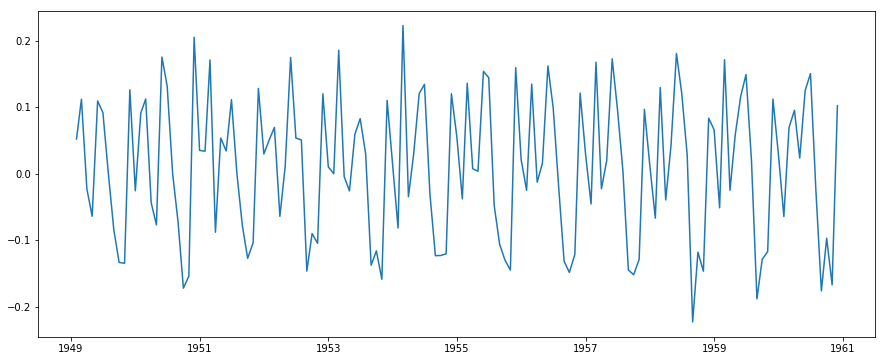

In [156]:
plt.plot(ts_log_diff)

/Users/sdidwani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/Users/sdidwani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


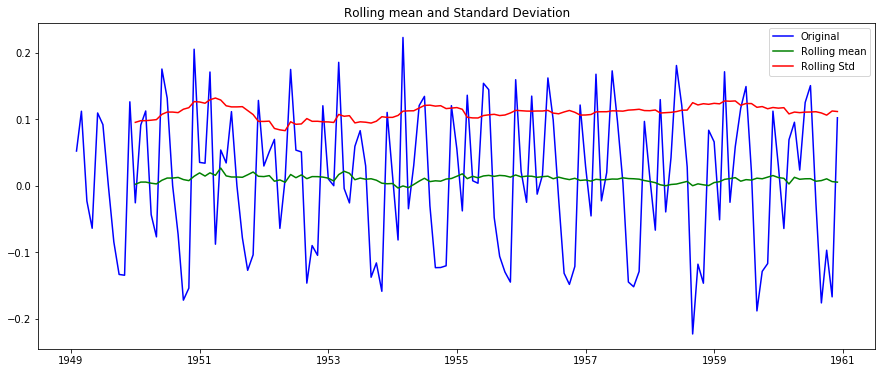

Result for Dickey Fuller test


Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64

In [158]:
test_stationarity(ts_log_diff)

In [159]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

In [163]:
trend = decomposition.trend
season = decomposition.seasonal
residual = decomposition.resid

/Users/sdidwani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(com=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


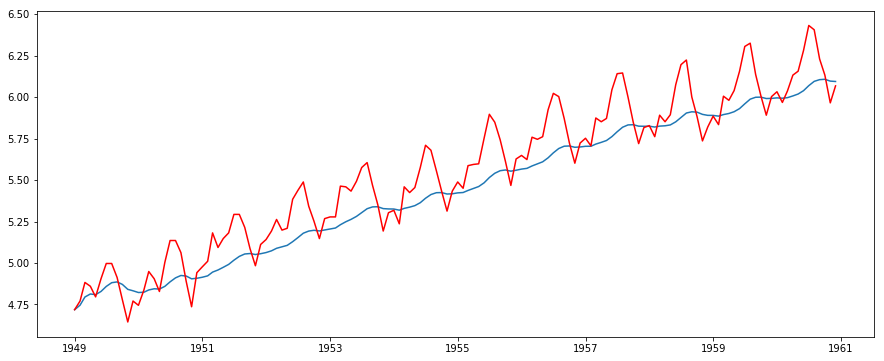

In [167]:
exponential = pd.ewma(ts_log,12)
plt.plot(exponential)
plt.plot(ts_log,color = 'Red')

/Users/sdidwani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/Users/sdidwani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


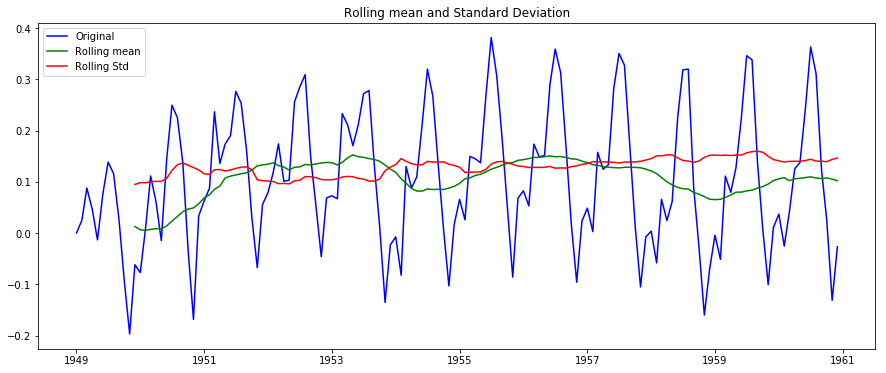

Result for Dickey Fuller test


Test Statistic                  -3.566092
p-value                          0.006443
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

In [169]:
ts_log_ewma_diff = ts_log-exponential
test_stationarity(ts_log_ewma_diff)

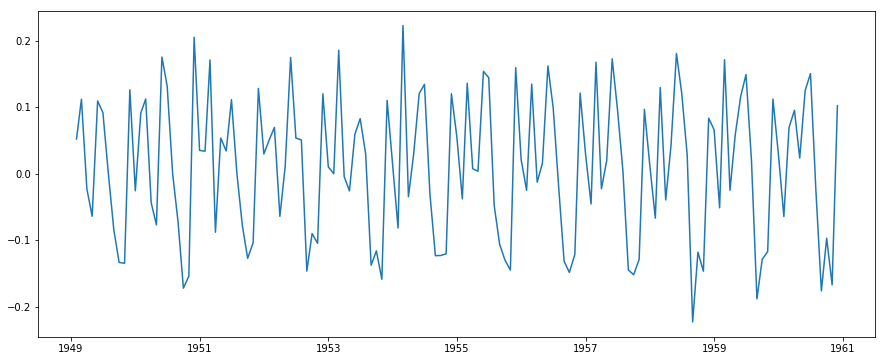

In [171]:
ts_log_diff = ts_log-ts_log.shift()
plt.plot(ts_log_diff)

In [172]:
ts_log_diff.head()

Month
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
Name: #Passengers, dtype: float64

In [173]:
ts_log_diff.dropna(inplace=  True)

/Users/sdidwani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/Users/sdidwani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


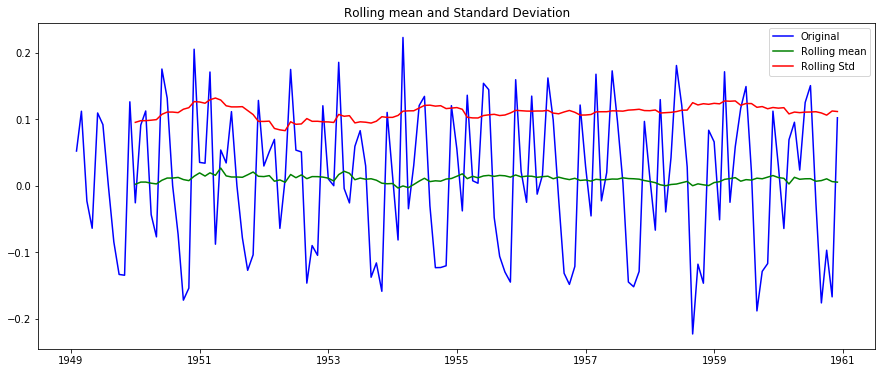

Result for Dickey Fuller test


Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64

In [175]:
test_stationarity(ts_log_diff)

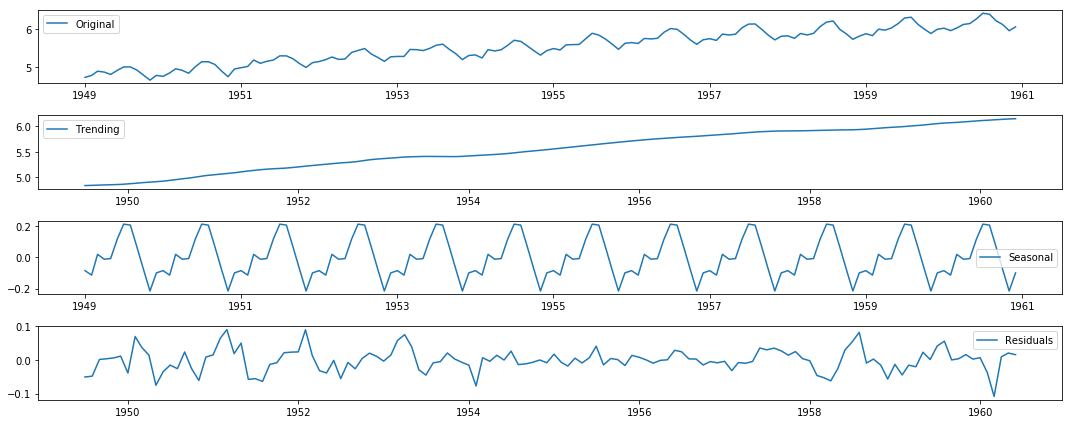

In [180]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)
trend = decomposition.trend
season = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(ts_log,label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend,label = 'Trending')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(season,label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual,label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

In [181]:
ts_log_decompose = residual
ts_log_decompose.head()

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: #Passengers, dtype: float64

In [182]:
ts_log_decompose.dropna(inplace = True)

/Users/sdidwani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
/Users/sdidwani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  This is separate from the ipykernel package so we can avoid doing imports until


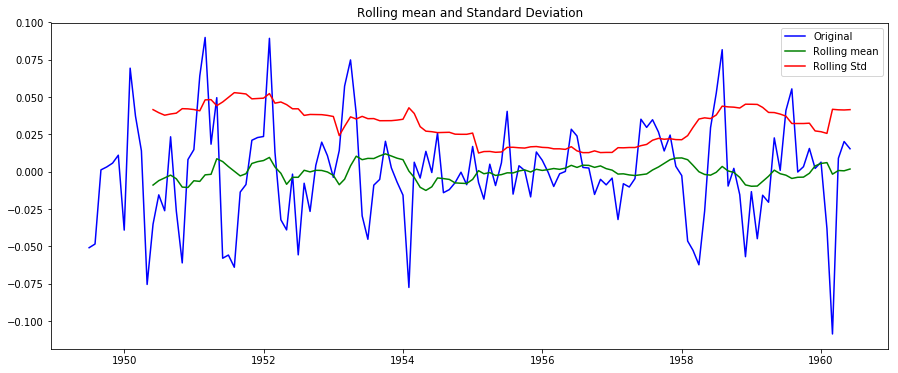

Result for Dickey Fuller test


Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64

In [183]:
test_stationarity(ts_log_decompose)

In [191]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(ts_log_diff,nlags = 20)
lag_pacf = pacf(ts_log_diff,nlags = 20,method = 'ols')

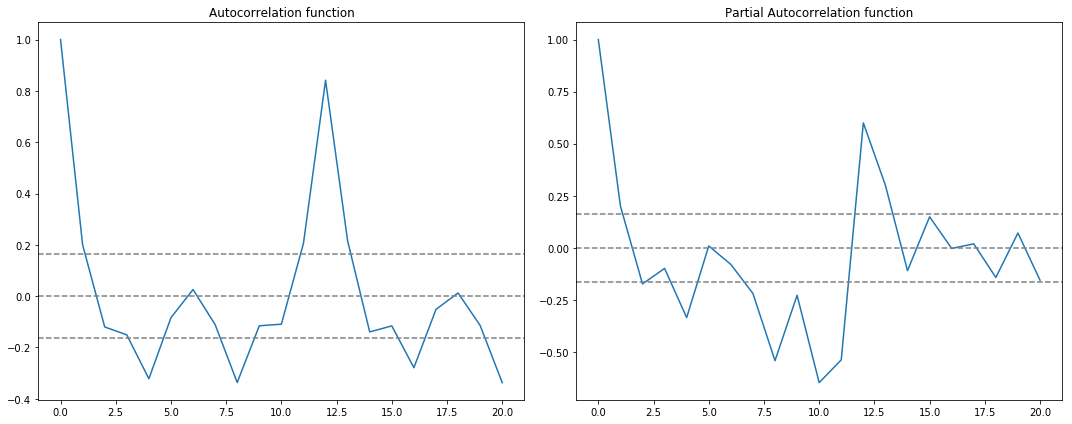

In [195]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation function')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation function')
plt.tight_layout()

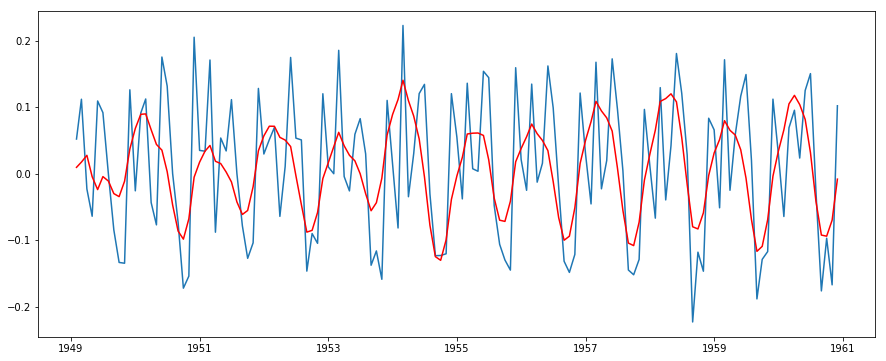

In [204]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log,order=(2,1,2))
results_ARima = model.fit(disp= -1)
plt.plot(ts_log_diff)
plt.plot(results_ARima.fittedvalues,color = 'red')


In [206]:
predictions_ARIMA_diff = pd.Series(results_ARima.fittedvalues,copy = True)
predictions_ARIMA_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64

In [208]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

/Users/sdidwani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


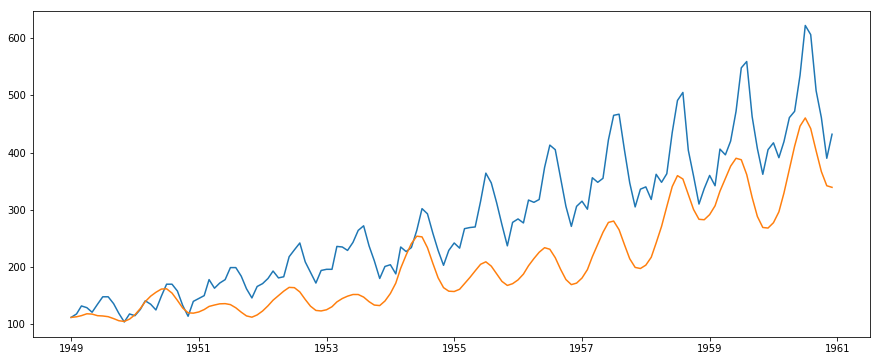

In [209]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)